In [383]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [324]:
#import data
df=pd.read_csv(r"C:\Users\User\Downloads\loan.csv")
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_1768\975024387.py:2: DtypeWarning: Columns (0,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\User\Downloads\loan.csv")


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,Jul-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,N
1,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,Oct-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,N
2,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,Jun-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,N
3,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,Apr-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,N
4,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,Jan-2017,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,N


In [325]:
#Contents of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3 non-null      object 
 1   loan_amnt                   42535 non-null  float64
 2   funded_amnt                 42535 non-null  float64
 3   funded_amnt_inv             42535 non-null  float64
 4   term                        42535 non-null  object 
 5   int_rate                    42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   grade                       42535 non-null  object 
 8   sub_grade                   42535 non-null  object 
 9   emp_title                   39909 non-null  object 
 10  emp_length                  41423 non-null  object 
 11  home_ownership              42535 non-null  object 
 12  annual_inc                  42531 non-null  float64
 13  verification_status         425

In [326]:
# Drop irrelevant columns
df = df.drop(['id', 'desc', 'title', 'zip_code', 'next_pymnt_d'], axis=1)

# Convert percentage column to float
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

# Fill missing values with 0 for numerical columns
df.fillna(0, inplace=True)

# Encode categorical columns
df = pd.get_dummies(df, columns=['term', 'grade', 'home_ownership', 'verification_status', 'purpose', 'application_type', 'initial_list_status', 'hardship_flag'], drop_first=True)

# Confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 77 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42538 non-null  float64
 1   funded_amnt                          42538 non-null  float64
 2   funded_amnt_inv                      42538 non-null  float64
 3   int_rate                             42538 non-null  float64
 4   installment                          42538 non-null  float64
 5   sub_grade                            42538 non-null  object 
 6   emp_title                            42538 non-null  object 
 7   emp_length                           42538 non-null  object 
 8   annual_inc                           42538 non-null  float64
 9   issue_d                              42538 non-null  object 
 10  loan_status                          42538 non-null  object 
 11  pymnt_plan                  

In [327]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [328]:
df.isna().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
int_rate                       0
installment                    0
                              ..
purpose_vacation               0
purpose_wedding                0
application_type_INDIVIDUAL    0
initial_list_status_f          0
hardship_flag_N                0
Length: 77, dtype: int64

In [329]:
#What is our target variable? Loan status
# Check unique values in loan_status
df['loan_status'].value_counts()

loan_status
Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
0                                                          3
Name: count, dtype: int64

In [330]:
"""
New Binary Classification:
"Good Loan" (1) → Fully Paid
"Bad Loan" (0) → Charged Off
We'll remove "Does not meet the credit policy" and the unknown "0" values since they might add noise.
"""

'\nNew Binary Classification:\n"Good Loan" (1) → Fully Paid\n"Bad Loan" (0) → Charged Off\nWe\'ll remove "Does not meet the credit policy" and the unknown "0" values since they might add noise.\n'

In [339]:
# Remove unwanted categories
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Convert loan_status to binary (1 = Fully Paid, 0 = Charged Off)
df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

# Verify the changes
df['loan_status'].value_counts()


loan_status
1    34116
0     5670
Name: count, dtype: int64

In [281]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_title,emp_length,annual_inc,issue_d,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,initial_list_status_f,hardship_flag_N
0,5000.0,5000.0,4975.0,10.65,162.87,B2,0,10+ years,24000.0,Dec-2011,...,False,False,False,False,False,False,False,True,True,True
1,2500.0,2500.0,2500.0,15.27,59.83,C4,Ryder,< 1 year,30000.0,Dec-2011,...,False,False,False,False,False,False,False,True,True,True
2,2400.0,2400.0,2400.0,15.96,84.33,C5,0,10+ years,12252.0,Dec-2011,...,False,False,False,False,True,False,False,True,True,True
3,10000.0,10000.0,10000.0,13.49,339.31,C1,AIR RESOURCES BOARD,10+ years,49200.0,Dec-2011,...,False,False,True,False,False,False,False,True,True,True
4,3000.0,3000.0,3000.0,12.69,67.79,B5,University Medical Group,1 year,80000.0,Dec-2011,...,False,False,True,False,False,False,False,True,True,True


In [282]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [283]:
df['emp_title'].value_counts()

emp_title
0                                2467
US Army                           134
Bank of America                   109
IBM                                66
AT&T                               60
                                 ... 
duncan tire co                      1
Bright House Networks               1
Florida Power & Light Company       1
Telefutura Net                      1
Evergreen Center                    1
Name: count, Length: 28863, dtype: int64

In [284]:
#Why should we drop emp_title column
"""
Too Many Unique Values → Each job title is unique, making it hard to generalize.
High Cardinality → One-hot encoding would create thousands of columns.
Doesn't Strongly Affect Loan Status → A person's job title alone isn't a strong predictor of loan default.
"""

"\nToo Many Unique Values → Each job title is unique, making it hard to generalize.\nHigh Cardinality → One-hot encoding would create thousands of columns.\nDoesn't Strongly Affect Loan Status → A person's job title alone isn't a strong predictor of loan default.\n"

In [341]:
# Drop emp_title since it has too many unique values
df = df.drop(['emp_title'], axis=1)

# Verify the change
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39786 entries, 0 to 39785
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39786 non-null  float64
 1   funded_amnt                          39786 non-null  float64
 2   funded_amnt_inv                      39786 non-null  float64
 3   int_rate                             39786 non-null  float64
 4   installment                          39786 non-null  float64
 5   sub_grade                            39786 non-null  object 
 6   emp_length                           39786 non-null  object 
 7   annual_inc                           39786 non-null  float64
 8   issue_d                              39786 non-null  object 
 9   loan_status                          39786 non-null  int64  
 10  pymnt_plan                           39786 non-null  object 
 11  addr_state                       

In [343]:
# Ensure columns are strings before replacing '%'
df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '', regex=True)
df['revol_util'] = df['revol_util'].astype(str).str.replace('%', '', regex=True)

# Convert to float (ignoring errors)
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
df['revol_util'] = pd.to_numeric(df['revol_util'], errors='coerce')

# Fill any remaining missing values with the median
df['int_rate'].fillna(df['int_rate'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

# Confirm the data types
df[['int_rate', 'revol_util']].dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_1768\3353092874.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['int_rate'].fillna(df['int_rate'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_1768\3353092874.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

int_rate      float64
revol_util    float64
dtype: object

In [345]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features (EXCLUDE loan_status)
numerical_features = df.drop(columns=['loan_status']).select_dtypes(include=['float64', 'int64']).columns

# Scale only numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verify that loan_status remains unchanged
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [347]:
df.shape

(39786, 76)

In [349]:
df['sub_grade'].value_counts()

sub_grade
B3    2924
A4    2886
A5    2742
B5    2709
B4    2514
C1    2142
B2    2058
C2    2014
B1    1830
A3    1810
C3    1529
A2    1508
D2    1352
C4    1238
C5    1188
D3    1178
A1    1139
D4     986
D1     931
D5     878
E1     768
E2     659
E3     556
E4     455
E5     420
F1     329
F2     251
F3     187
F4     169
F5     118
G1     105
G2      78
G4      56
G3      49
G5      30
Name: count, dtype: int64

In [351]:
# Create an ordinal encoder
encoder = OrdinalEncoder(categories=[sorted(df['sub_grade'].unique())])

# Transform the sub_grade column
df.loc[:, 'sub_grade'] = encoder.fit_transform(df[['sub_grade']])

# Convert to integer (optional)
df['sub_grade'] = df['sub_grade'].astype(int)

# Verify encoding
df[['sub_grade']].head()


,sub_grade
0,6
1,13
2,14
3,10
4,9


In [353]:
# Count unique sub_grade values after encoding
df['sub_grade'].nunique(), df['sub_grade'].unique()

(35,
 array([ 6, 13, 14, 10,  9,  3, 20, 26, 12,  5, 15,  0,  7,  8, 11, 16,  2,
         4, 19,  1, 23, 17, 18, 27, 22, 28, 25, 24, 33, 21, 32, 31, 30, 29,
        34]))

C:\Users\User\AppData\Local\Temp\ipykernel_1768\1444407057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['loan_status'], palette='coolwarm')


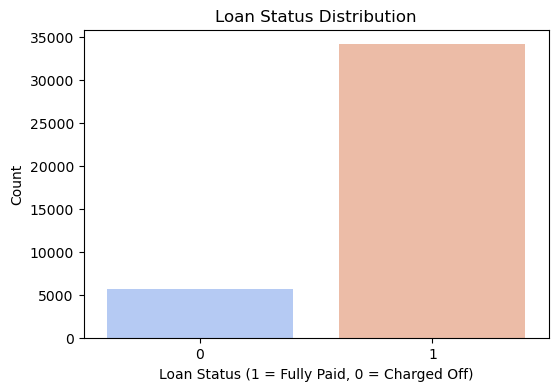

In [355]:
#Lets Check Class Imbalance in loan_status
# Plot loan_status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['loan_status'], palette='coolwarm')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (1 = Fully Paid, 0 = Charged Off)')
plt.ylabel('Count')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1768\740979906.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['int_rate'], palette='coolwarm')


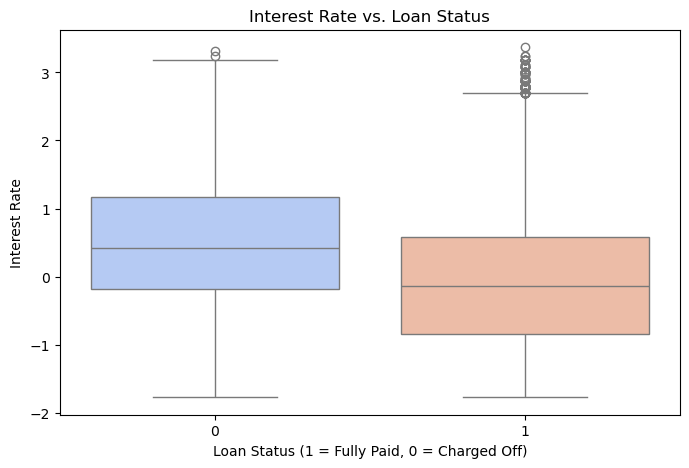

In [357]:
#Check int_rate vs. loan_status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loan_status'], y=df['int_rate'], palette='coolwarm')
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status (1 = Fully Paid, 0 = Charged Off)')
plt.ylabel('Interest Rate')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1768\3011782116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['loan_status'], y=df['loan_amnt'], palette='coolwarm')


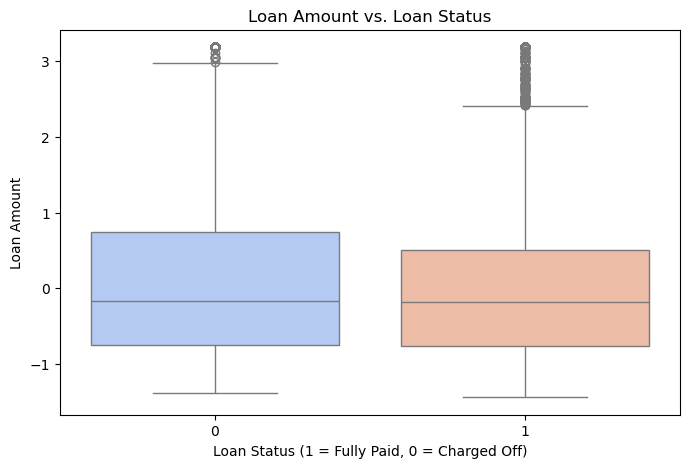

In [359]:
#Check loan_amnt vs. loan_status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loan_status'], y=df['loan_amnt'], palette='coolwarm')
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status (1 = Fully Paid, 0 = Charged Off)')
plt.ylabel('Loan Amount')
plt.show()

In [361]:
# Convert 'emp_length' to numerical values
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,
    'n/a': 0  # Treat 'n/a' as 0 (no experience)
}).astype(int)

# Verify changes
df['emp_length'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_1768\715201066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace({


array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [363]:
#Check Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Dec-2011'

<Figure size 1200x800 with 0 Axes>

In [365]:
# Find non-numeric columns
df.dtypes[df.dtypes == 'object']

issue_d               object
pymnt_plan            object
addr_state            object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object

In [ ]:
"""
Drop Unnecessary Columns
Some of these columns won’t help KNN and should be removed:

Dates → issue_d, earliest_cr_line, last_pymnt_d, last_credit_pull_d
Single-Value Columns (Not useful) → pymnt_plan (Usually all "n")
"""

In [367]:
df = df.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d', 'pymnt_plan'])

In [369]:
#Encode addr_state (State of Borrower)
# Encode state into numbers
encoder = LabelEncoder()
df['addr_state'] = encoder.fit_transform(df['addr_state'])

# Verify changes
df['addr_state'].unique()

array([ 3, 10, 14,  4, 36, 27, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 17,
       34, 39, 38, 18, 19, 46, 47,  1,  5, 16, 32,  0, 20, 48, 45, 22,  7,
       40, 29,  2, 31, 26, 11, 49, 35,  8, 25, 41, 12, 28, 13, 15, 21])

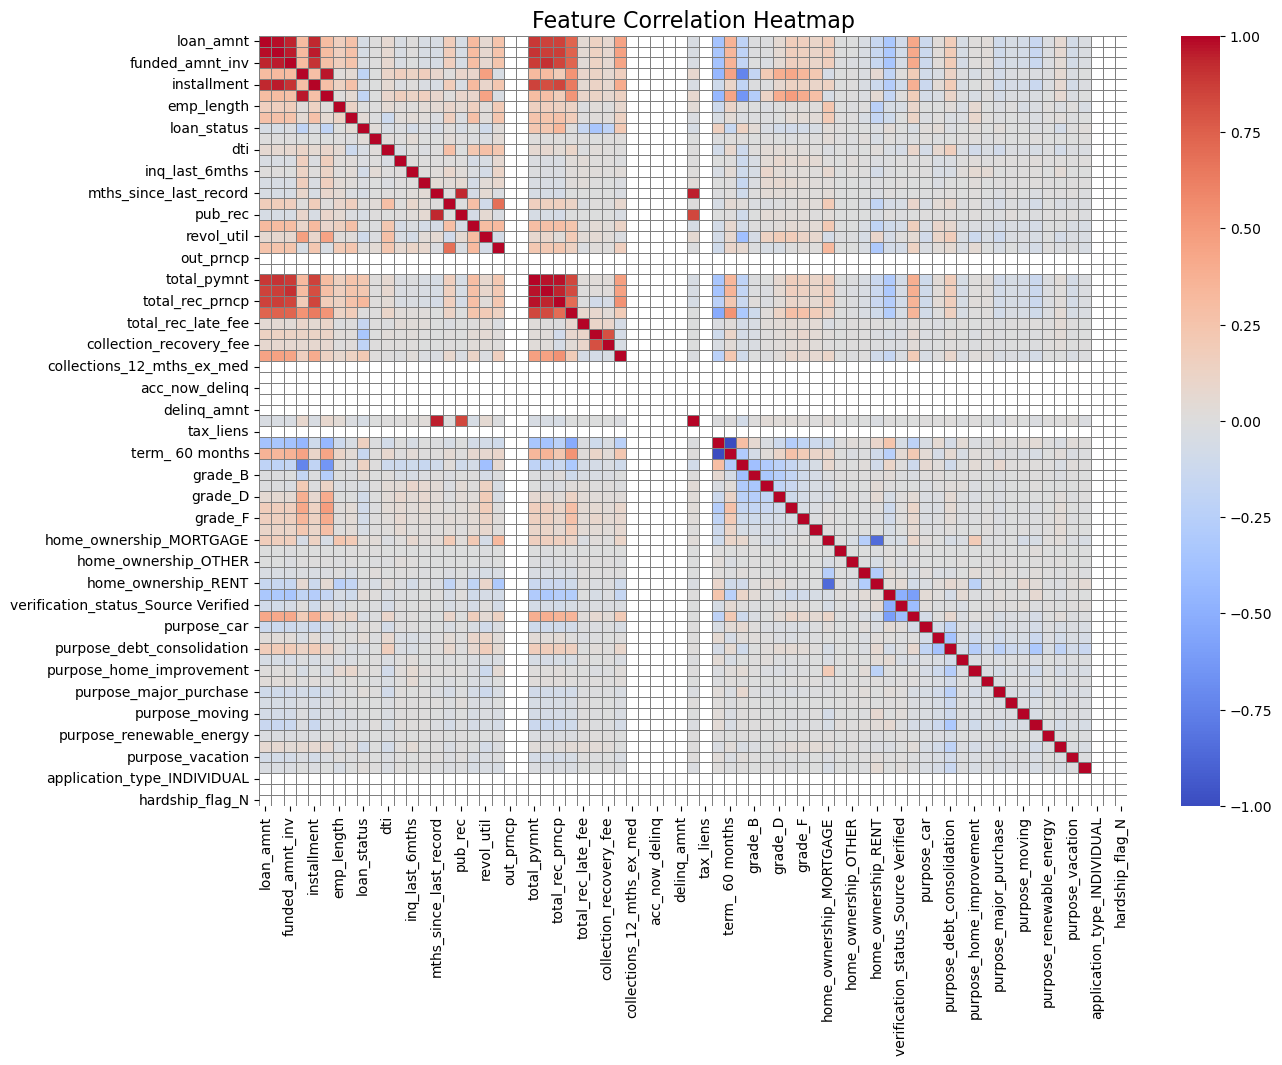

In [371]:
#Heatmap
plt.figure(figsize=(14, 10))  # Bigger figure size
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, linewidths=0.5, linecolor='gray', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [389]:
"""
Identify Important Features
Since KNN is distance-based, we want to:
1. Keep features that correlate well with loan_status.
2. Remove highly correlated features (to avoid redundancy).
3. Avoid unnecessary columns that add noise.
"""

'\nIdentify Important Features\nSince KNN is distance-based, we want to:\n1. Keep features that correlate well with loan_status.\n2. Remove highly correlated features (to avoid redundancy).\n3. Avoid unnecessary columns that add noise.\n'

In [393]:
# Check correlation of features with loan_status
correlation = df.corr()['loan_status'].sort_values(ascending=False)
correlation.head(20)

loan_status                1.000000
total_rec_prncp            0.331227
total_pymnt                0.233497
total_pymnt_inv            0.230702
last_pymnt_amnt            0.215818
term_ 36 months            0.149151
grade_A                    0.138053
term_ 60 months           -0.149151
total_rec_late_fee        -0.160817
sub_grade                 -0.194928
int_rate                  -0.197918
collection_recovery_fee   -0.207303
recoveries                -0.339278
Name: loan_status, dtype: float64

In [375]:
# Set correlation threshold (keep features with |correlation| > 0.1)
corr_threshold = 0.1

# Compute correlations with loan_status
correlation = df.corr()['loan_status'].sort_values(ascending=False)

# Select features above the threshold
selected_features = correlation[abs(correlation) > corr_threshold].index.tolist()

# Keep only selected features in the dataset
df = df[selected_features]

# Verify final selected features
df.head()


,loan_status,total_rec_prncp,total_pymnt,total_pymnt_inv,last_pymnt_amnt,term_ 36 months,grade_A,term_ 60 months,total_rec_late_fee,sub_grade,int_rate,collection_recovery_fee,recoveries
0,1,-0.679719,-0.694605,-0.640585,-0.564321,True,False,False,-0.187702,6,-0.369659,-0.084512,-0.138315
1,0,-1.315777,-1.223512,-1.171890,-0.576015,False,False,True,-0.187702,13,0.869805,-0.077178,0.035818
2,1,-1.043698,-1.006311,-0.952376,-0.456679,True,False,False,-0.187702,14,1.054919,-0.084512,-0.138315
3,1,0.020239,0.000121,0.064768,-0.522492,True,False,False,2.105899,10,0.392262,-0.084512,-0.138315
4,1,-0.959703,-0.890547,-0.835380,-0.587799,False,False,True,-0.187702,9,0.177637,-0.084512,-0.138315


In [ ]:
df.shape

In [317]:
df.columns

Index(['loan_status', 'total_rec_prncp', 'total_pymnt', 'total_pymnt_inv',
       'last_pymnt_amnt', 'term_ 36 months', 'grade_A', 'term_ 60 months',
       'total_rec_late_fee', 'sub_grade', 'int_rate',
       'collection_recovery_fee', 'recoveries'],
      dtype='object')

In [377]:
# Show unique values in loan_status
df['loan_status'].unique()

array([1, 0], dtype=int64)

In [379]:

# Define features (X) and target (y)
X = df.drop(columns=['loan_status'])  # Features (all except loan_status)
y = df['loan_status']  # Target (1 = Fully Paid, 0 = Charged Off)

# Split into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((31828, 12), (7958, 12), (31828,), (7958,))

In [381]:
#Train the KNN Model
# Initialize KNN with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Model Accuracy: {accuracy:.4f}')

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


KNN Model Accuracy: 0.9393

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.64      0.75      1109
           1       0.94      0.99      0.97      6849

    accuracy                           0.94      7958
   macro avg       0.92      0.81      0.86      7958
weighted avg       0.94      0.94      0.93      7958


Confusion Matrix:
 [[ 710  399]
 [  84 6765]]


Best k: 3


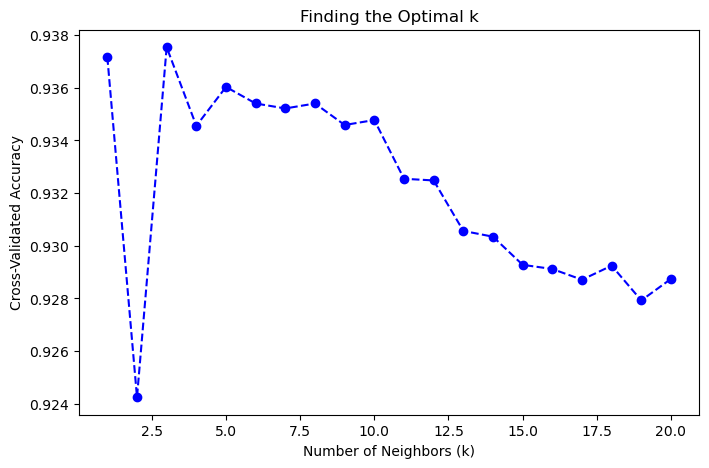

In [385]:
#Tune k for Better Performance
# Try different values of k
k_values = range(1, 21)  # Test k from 1 to 20
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k
best_k = k_values[np.argmax(cv_scores)]
print(f'Best k: {best_k}')

# Plot k vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Finding the Optimal k')
plt.show()

In [387]:
#Train KNN with k=3
# Train the optimized KNN model
knn_optimized = KNeighborsClassifier(n_neighbors=3)
knn_optimized.fit(X_train, y_train)

# Make predictions
y_pred_optimized = knn_optimized.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_optimized)
print(f'Optimized KNN Model Accuracy (k=3): {accuracy:.4f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred_optimized))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_optimized))

Optimized KNN Model Accuracy (k=3): 0.9407

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.66      0.76      1109
           1       0.95      0.99      0.97      6849

    accuracy                           0.94      7958
   macro avg       0.91      0.82      0.86      7958
weighted avg       0.94      0.94      0.94      7958


Confusion Matrix:
 [[ 737  372]
 [ 100 6749]]
